# IED rate as a function of frequency for the frequency sweep task

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os
import scipy.stats as stats
from scipy.io import loadmat
import re

## 1: Import Eric and Lou's ied_table

In [2]:
xl_path=os.path.abspath("C:/Users/sinad/OneDrive - Georgia Institute of Technology/DrGross/Lou/IED_rate/ied_table.xlsx")
xl_path

'C:\\Users\\sinad\\OneDrive - Georgia Institute of Technology\\DrGross\\Lou\\IED_rate\\ied_table.xlsx'

In [3]:
ied_df = pd.read_excel(xl_path)
ied_df

,subjectID,task_name,ses_nber,soz_anat,ch,ch_anat,ch_anat_combined,ch_region,cond,session_ied_rate,...,mod_sig,mod_amp,ied_count_soz,ied_count_nonsoz,ied_count_pfc,ied_count_mtl,ied_count_visual,ied_count_audio,ied_count_other,modality
0,FL013,flickerfreq,1,occipital,all,all,ctx-lateralorbitofrontal,all,5.5Hz-V,42.265619,...,0.7149,-0.126898,3,6,0,3,0,0,6,Visual
1,FL013,flickerfreq,1,occipital,all,all,ctx-lateralorbitofrontal,all,5.5Hz-V,42.265619,...,0.7149,-0.126898,1,9,1,3,0,0,6,Visual
2,FL013,flickerfreq,1,occipital,all,all,ctx-lateralorbitofrontal,all,5.5Hz-V,42.265619,...,0.7149,-0.126898,1,1,0,0,0,0,2,Visual
3,FL013,flickerfreq,1,occipital,all,all,ctx-lateralorbitofrontal,all,5.5Hz-V,42.265619,...,0.7149,-0.126898,0,2,0,0,0,0,2,Visual
4,FL013,flickerfreq,1,occipital,all,all,ctx-lateralorbitofrontal,all,5.5Hz-V,42.265619,...,0.7149,-0.126898,0,11,1,6,0,0,4,Visual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,FL022,flickerfreq,1,frontal,all,all,ctx-precentral,all,R-A,19.240606,...,NaN,NaN,0,7,0,3,0,1,3,Audio
5816,FL022,flickerfreq,1,frontal,all,all,ctx-precentral,all,R-A,19.240606,...,NaN,NaN,0,3,0,1,0,2,0,Audio
5817,FL022,flickerfreq,1,frontal,all,all,ctx-precentral,all,R-A,19.240606,...,NaN,NaN,0,2,0,1,0,0,1,Audio
5818,FL022,flickerfreq,1,frontal,all,all,ctx-precentral,all,R-A,19.240606,...,NaN,NaN,0,4,0,3,0,1,0,Audio


## 2. Select the columns for condition when stim was on and the IED count

In [4]:
ied_df_sel = ied_df.loc[:,['cond','baseline','ied_count']]
ied_df_sel

,cond,baseline,ied_count
0,5.5Hz-V,0,9
1,5.5Hz-V,1,10
2,5.5Hz-V,0,2
3,5.5Hz-V,1,2
4,5.5Hz-V,0,11
...,...,...,...
5815,R-A,1,7
5816,R-A,0,3
5817,R-A,1,2
5818,R-A,0,4


In [5]:
ied_df_sel_stim = ied_df_sel[ied_df_sel.loc[:,'baseline']==0]
ied_df_sel_stim.tail(20)

,cond,baseline,ied_count
5780,80Hz-A,0,1
5782,80Hz-A,0,2
5784,80Hz-A,0,0
5786,80Hz-A,0,1
5788,80Hz-A,0,4
5790,80Hz-A,0,3
5792,80Hz-A,0,12
5794,80Hz-A,0,2
5796,80Hz-A,0,1
5798,80Hz-A,0,1


## 3. Extract the frequency of stimulation from the condition label

In [6]:
ied_df_sel_stim.iloc[1455,0]

'45Hz-V'

In [7]:
freq = re.search(r'\d+', ied_df_sel_stim.iloc[1455,0]).group()
freq

'45'

In [8]:
ied_df_sel_stim.index.values[1455]

2910

In [9]:
for idx, c in enumerate(ied_df_sel_stim.index.values[:-1]):
    #print(idx, c)
    if re.search(r'\d+\.\d+', ied_df_sel_stim.iloc[idx,0]):
        ied_df_sel_stim.loc[c,"frequency"]=5.5
    elif re.search(r'\d+', ied_df_sel_stim.iloc[idx,0]):
        ied_df_sel_stim.loc[c,"frequency"]= re.search(r'\d+', ied_df_sel_stim.iloc[idx,0]).group()


C:\Users\sinad\AppData\Local\Temp\ipykernel_26064\397859768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ied_df_sel_stim.loc[c,"frequency"]=5.5


In [10]:
ied_df_sel_stim.tail(25)

,cond,baseline,ied_count,frequency
5770,78Hz-A,0,1,78
5772,78Hz-A,0,2,78
5774,78Hz-A,0,9,78
5776,78Hz-A,0,1,78
5778,78Hz-A,0,1,78
5780,80Hz-A,0,1,80
5782,80Hz-A,0,2,80
5784,80Hz-A,0,0,80
5786,80Hz-A,0,1,80
5788,80Hz-A,0,4,80


## 4. IED rate calculations


In [11]:
# drop NAN:
ied_df_sel_stim.dropna(inplace=True)
ied_df_sel_stim.tail(10)

C:\Users\sinad\AppData\Local\Temp\ipykernel_26064\1122827827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ied_df_sel_stim.dropna(inplace=True)


,cond,baseline,ied_count,frequency
5780,80Hz-A,0,1,80
5782,80Hz-A,0,2,80
5784,80Hz-A,0,0,80
5786,80Hz-A,0,1,80
5788,80Hz-A,0,4,80
5790,80Hz-A,0,3,80
5792,80Hz-A,0,12,80
5794,80Hz-A,0,2,80
5796,80Hz-A,0,1,80
5798,80Hz-A,0,1,80


In [12]:
# IED count is per 10 sec stimulation, to get the rate per second, divide by 10
ied_df_sel_stim['ied_rate(sec)']=ied_df_sel_stim.loc[:,'ied_count']/10
ied_df_sel_stim.head()

C:\Users\sinad\AppData\Local\Temp\ipykernel_26064\4130141827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ied_df_sel_stim['ied_rate(sec)']=ied_df_sel_stim.loc[:,'ied_count']/10


,cond,baseline,ied_count,frequency,ied_rate(sec)
0,5.5Hz-V,0,9,5.5,0.9
2,5.5Hz-V,0,2,5.5,0.2
4,5.5Hz-V,0,11,5.5,1.1
6,5.5Hz-V,0,16,5.5,1.6
8,5.5Hz-V,0,14,5.5,1.4


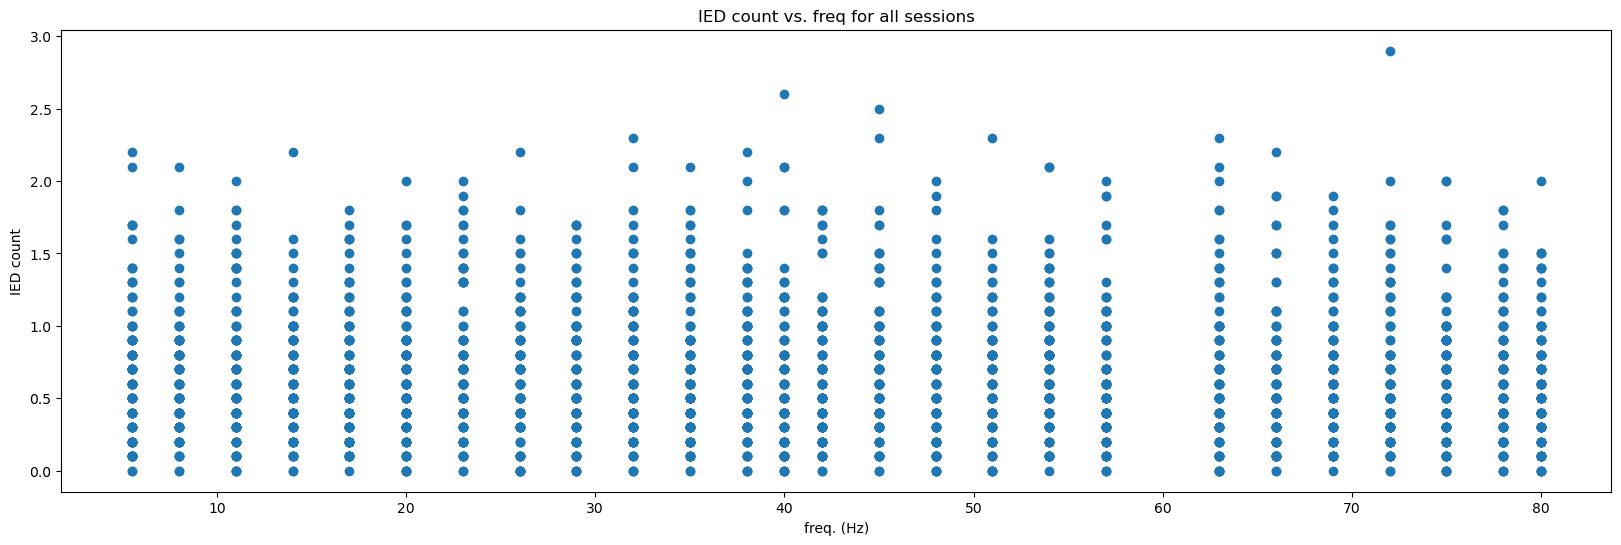

In [13]:
plt.figure(figsize=(20,6))
plt.scatter(ied_df_sel_stim.iloc[:,3],ied_df_sel_stim.iloc[:,4]);
plt.xlabel('freq. (Hz)');
plt.ylabel('IED count');
plt.title(str("IED count vs. freq for all sessions"));
plt.show()

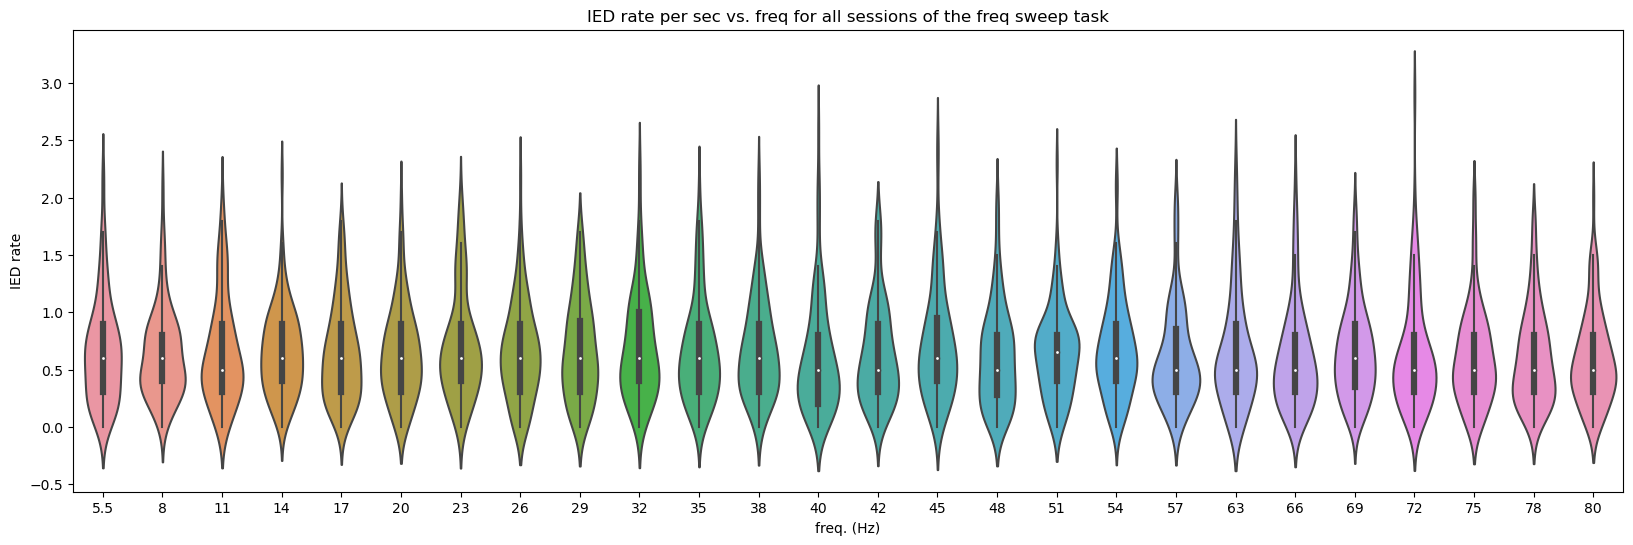

In [14]:
plt.figure(figsize=(20,6))
sns.violinplot(x=ied_df_sel_stim.iloc[:,3], y=ied_df_sel_stim.iloc[:,4])
plt.xlabel('freq. (Hz)');
plt.ylabel('IED rate');
plt.title(str("IED rate per sec vs. freq for all sessions of the freq sweep task"));
plt.show()

In [15]:
ied_df_sel_stim.describe()

,baseline,ied_count,ied_rate(sec)
count,2802.0,2802.000000,2802.000000
mean,0.0,6.424340,0.642434
std,0.0,4.332423,0.433242
min,0.0,0.000000,0.000000
25%,0.0,3.000000,0.300000
50%,0.0,6.000000,0.600000
75%,0.0,9.000000,0.900000
max,0.0,29.000000,2.900000


Since the IED rate doesn't change much as freq changes with steps of 3 Hz, and mean is 0.64 and median 0.6 IED/sec, we can initialize length scale close to 1, and varaince of 0.4. 

In [17]:
ied_rate_df = ied_df_sel_stim.loc[:,['frequency','ied_rate(sec)']]
ied_rate_df

,frequency,ied_rate(sec)
0,5.5,0.9
2,5.5,0.2
4,5.5,1.1
6,5.5,1.6
8,5.5,1.4
...,...,...
5790,80,0.3
5792,80,1.2
5794,80,0.2
5796,80,0.1


In [20]:
output_path = os.path.abspath('C:/Users/sinad/OneDrive - Georgia Institute of Technology/DrGross/Lou/IED_rate/ied_rate_df.csv')
output_path

'C:\\Users\\sinad\\OneDrive - Georgia Institute of Technology\\DrGross\\Lou\\IED_rate\\ied_rate_df.csv'

In [21]:
ied_rate_df.to_csv(output_path)